In [44]:
import sys
import secondary_utils as su
import frc_utils as frc_util
import imageio
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import numpy.fft as fft
from scipy.interpolate import interp1d
from PIL import Image
from pylab import figure, cm
from matplotlib.colors import LogNorm

244


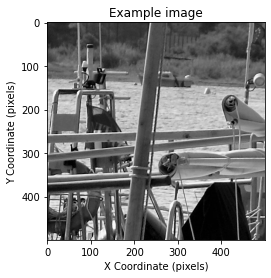

In [2]:
def gauss_noise(image, mean=0, var=0.001):

    '''
                 Add Gaussian noise
                 mean: mean value
                 var: variance
    '''
    
    image = np.array(image, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)

    return out

#lena  = su.imageio_imread('./demo_images/514/Result of Siemens0.jpg')
lena  = su.imageio_imread('./demo_images/barques.jpg')
lena  = lena[:, :,0]
lena  = lena[750:1250,1500:2000]
print(np.max(lena))
lena  = lena.astype(float)
lena  = su.normalize_data_ab(0, 1, lena)

#average true signal in each pixel of lena 
h, w = lena.shape
plt.imshow(lena, cmap='Greys_r')
plt.title('Example image')
plt.xlabel("X Coordinate (pixels)")
plt.ylabel("Y Coordinate (pixels)")
plt.show()
plt.close()

(500, 500)


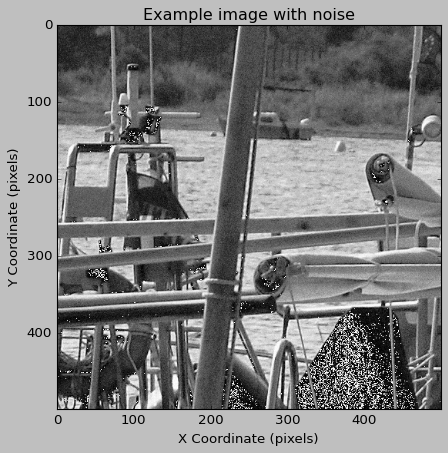

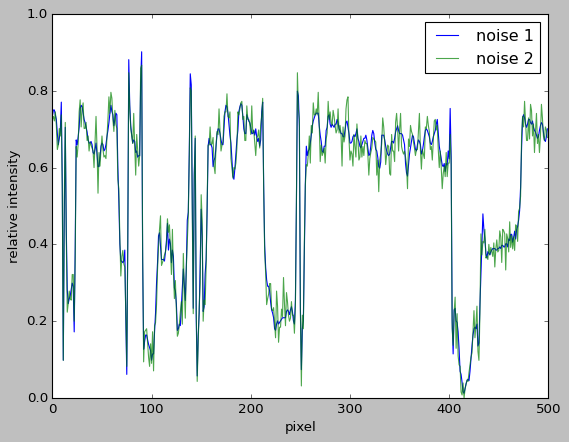

In [42]:
fft_lena     = (np.real(fft.fftshift(fft.fft2(lena))))
lena_noise1 = gauss_noise(lena,0,0.001)
barques_noise1 = Image.fromarray(lena_noise1)
barques_noise1.save("barques_noise1000.jpg")
lena_noise2 = gauss_noise(lena,0,0.001)
barques_noise2 = Image.fromarray(lena_noise2)
barques_noise2.save("barques_noise2000.jpg")
fft_noise1 = np.real(fft.fftshift(fft.fft2(lena_noise1)))
fft_noise2 = np.real(fft.fftshift(fft.fft2(lena_noise2)))
R = np.max(fft_lena)
fft_lena_norm     = (255/(np.log(1+np.abs(R))))*np.log(1+np.abs(fft_lena))
R = np.max(fft_noise1)
fft_noise1_norm = (255/(np.log(1+np.abs(R))))*np.log(1+np.abs(fft_noise1))
R = np.max(fft_noise2)
fft_noise2_norm = (255/(np.log(1+np.abs(R))))*np.log(1+np.abs(fft_noise2))
print(np.shape(fft_lena))
plt.imshow(lena_noise1, cmap='Greys_r')
plt.title('Example image with noise')
plt.xlabel("X Coordinate (pixels)")
plt.ylabel("Y Coordinate (pixels)")
plt.show()
plt.close()
lena_noise1  = su.normalize_data_ab(0, 1, lena_noise1)
lena_noise2  = su.normalize_data_ab(0, 1, lena_noise2)
plt.plot(lena[200],label="noise 1")
plt.plot(lena_noise1[200],label="noise 2",alpha=0.7)
plt.xlabel("pixel")
plt.ylabel("relative intensity")
plt.legend()
plt.show()
plt.close()

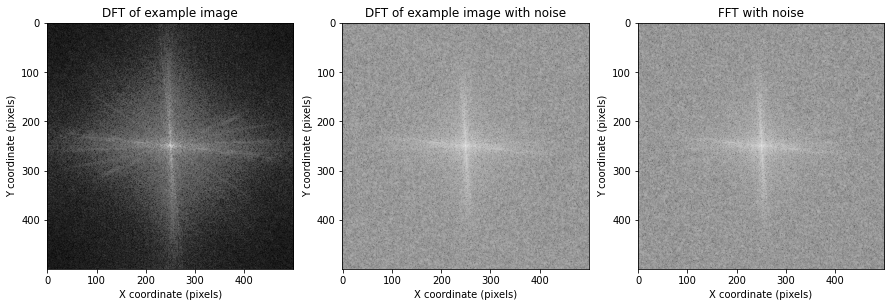

In [9]:

f, axrr = plt.subplots(1, 3,figsize=[15,12])

#f.colorbar(axrr[0].imshow(noise1, cmap='Greys_r'), ax=axrr[0])
axrr[2].imshow(np.real(fft_noise2_norm), cmap='Greys_r')
axrr[2].set_title('FFT with noise')
axrr[2].set_xlabel("X coordinate (pixels)")
axrr[2].set_ylabel("Y coordinate (pixels)")
axrr[0].imshow(np.real(fft_lena_norm), cmap='Greys_r')
axrr[0].set_title('DFT of example image')
axrr[0].set_xlabel("X coordinate (pixels)")
axrr[0].set_ylabel("Y coordinate (pixels)")
axrr[1].imshow(np.real(fft_noise1_norm), cmap='Greys_r')
axrr[1].set_title('DFT of example image with noise')
axrr[1].set_xlabel("X coordinate (pixels)")
axrr[1].set_ylabel("Y coordinate (pixels)")
plt.show()

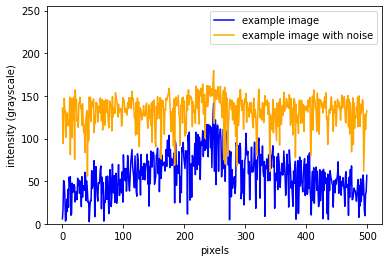

In [11]:
plt.plot(np.real(fft_lena_norm[200]),label="example image",color="blue")
plt.plot(np.real(fft_noise1_norm[200]),label="example image with noise",alpha=1,color="orange")
plt.xlabel("pixels")
plt.ylabel("intensity (grayscale)")
plt.legend()
plt.ylim(0,255)
plt.show()
plt.close()

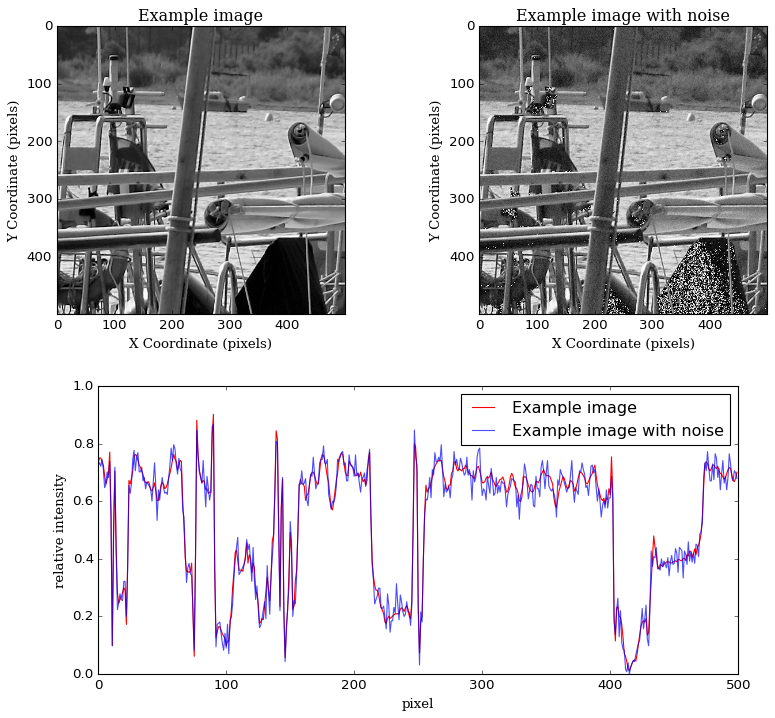

In [57]:
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=12)
fig.patch.set_facecolor('white')
subplots = [[0.05, 0.55, 0.32, 0.4], [0.33, 0.55, 0.42, 0.4], [0.13, 0.05, 0.5, 0.4]]
fig  = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
ax = fig.add_axes(subplots[0])
ax.imshow(lena, cmap='Greys_r')
ax.set_title('Example image',fontname="serif")
ax.set_xlabel("X Coordinate (pixels)",fontname="serif")
ax.set_ylabel("Y Coordinate (pixels)",fontname="serif")
# plot your stuf here
ax = fig.add_axes(subplots[1])
ax.imshow(lena_noise1, cmap='Greys_r')
ax.set_title('Example image with noise',fontname="serif")
ax.set_xlabel("X Coordinate (pixels)",fontname="serif")
ax.set_ylabel("Y Coordinate (pixels)",fontname="serif")
ax = fig.add_axes(subplots[2])
lena_noise1  = su.normalize_data_ab(0, 1, lena_noise1)
lena_noise2  = su.normalize_data_ab(0, 1, lena_noise2)
ax.plot(lena[200],label="Example image",color="red")
ax.plot(lena_noise1[200],label="Example image with noise",alpha=0.7)
ax.set_xlabel("pixel",fontname="serif")
ax.set_ylabel("relative intensity",fontname="serif")
ax.legend()
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Fourier/"
file_name = "Noisy-comparison"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')

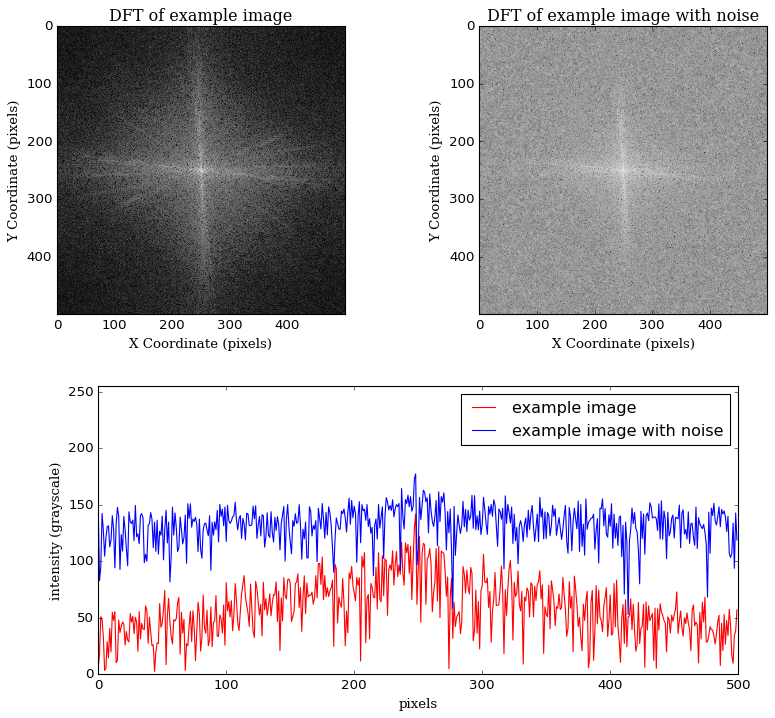

In [58]:
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=12)
fig.patch.set_facecolor('white')
subplots = [[0.05, 0.55, 0.32, 0.4], [0.33, 0.55, 0.42, 0.4], [0.13, 0.05, 0.5, 0.4]]
fig  = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
ax = fig.add_axes(subplots[0])
ax.imshow(np.real(fft_lena_norm), cmap='Greys_r')
ax.set_title('DFT of example image',fontname="serif")
ax.set_xlabel("X Coordinate (pixels)",fontname="serif")
ax.set_ylabel("Y Coordinate (pixels)",fontname="serif")
# plot your stuf here
ax = fig.add_axes(subplots[1])
ax.imshow(np.real(fft_noise1_norm), cmap='Greys_r')
ax.set_title('DFT of example image with noise',fontname="serif")
ax.set_xlabel("X Coordinate (pixels)",fontname="serif")
ax.set_ylabel("Y Coordinate (pixels)",fontname="serif")
ax = fig.add_axes(subplots[2])
ax.plot(np.real(fft_lena_norm[200]),label="example image",color="red")
ax.plot(np.real(fft_noise1_norm[200]),label="example image with noise",alpha=1,color="blue")
ax.set_xlabel("pixels",fontname="serif")
ax.set_ylabel("intensity (grayscale)",fontname="serif")
ax.legend()
ax.set_ylim(0,255)
ax.legend()
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Fourier/"
file_name = "fft_comparison"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')